In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
original_samples  = x_train.shape[0]
# reduce train data for trainning during presentation
n_samples = 200
x_train = x_train[:n_samples,:]
y_train = y_train[:n_samples]
print("Reduced training samples from {0:,} to {1}".format(original_samples, x_train.shape[0]))
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Reduced training samples from 60,000 to 200


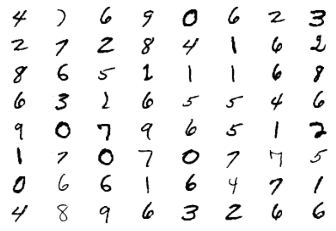

In [2]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

seed = 7
np.random.seed(seed)

In [4]:
def create_dense_model():
    """ 
    """
    input_size= 784
    output_size = 10
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_size, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [5]:
model = KerasClassifier(build_fn=create_dense_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# train with gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.330000 using {'batch_size': 80, 'epochs': 100}

0.245000 (0.065000) with: {'batch_size': 10, 'epochs': 10}
0.225000 (0.005000) with: {'batch_size': 10, 'epochs': 50}
0.255000 (0.005000) with: {'batch_size': 10, 'epochs': 100}
0.185000 (0.055000) with: {'batch_size': 20, 'epochs': 10}
0.160000 (0.040000) with: {'batch_size': 20, 'epochs': 50}
0.205000 (0.025000) with: {'batch_size': 20, 'epochs': 100}
0.165000 (0.025000) with: {'batch_size': 40, 'epochs': 10}
0.270000 (0.020000) with: {'batch_size': 40, 'epochs': 50}
0.300000 (0.060000) with: {'batch_size': 40, 'epochs': 100}
0.245000 (0.005000) with: {'batch_size': 60, 'epochs': 10}
0.185000 (0.055000) with: {'batch_size': 60, 'epochs': 50}
0.295000 (0.065000) with: {'batch_size': 60, 'epochs': 100}
0.150000 (0.010000) with: {'batch_size': 80, 'epochs': 10}
0.275000 (0.065000) with: {'batch_size': 80, 'epochs': 50}
0.330000 (0.000000) with: {'batch_size': 80, 'epochs': 100}
0.210000 (0.020000) with: {'batch_size': 100, 'epochs'

# Tune Optimizer
https://keras.io/api/optimizers/

The optimizer can be specified as an object and particular hyperparameters can be taken in account

In [6]:
def create_dense_model_w_optimizer(optimizer='adam'):
    """
    """
    input_size= 784
    output_size = 10
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_size, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [7]:
model = KerasClassifier(build_fn=create_dense_model_w_optimizer, epochs=10, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

# train with gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.255088 using {'optimizer': 'RMSprop'}

0.084954 (0.013813) with: {'optimizer': 'SGD'}
0.255088 (0.068176) with: {'optimizer': 'RMSprop'}
0.174808 (0.045558) with: {'optimizer': 'Adagrad'}
0.110131 (0.035669) with: {'optimizer': 'Adadelta'}
0.189733 (0.048501) with: {'optimizer': 'Adam'}
0.244535 (0.093908) with: {'optimizer': 'Adamax'}
0.094829 (0.024955) with: {'optimizer': 'Nadam'}


#  Tune Weight initialization

In [8]:
def create_dense_model_w_initialization(optimizer='RMSprop',init_mode='uniform'):
    """ Tune optimizer options: 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'
    """
    # create model
    input_size= 784
    output_size = 10
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_size, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(output_size, activation='softmax', kernel_initializer=init_mode))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [9]:
model = KerasClassifier(build_fn=create_dense_model_w_initialization, epochs=10, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

# train with gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(x_test, y_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835100 using {'init_mode': 'uniform'}

0.835100 (0.027100) with: {'init_mode': 'uniform'}
0.327400 (0.026000) with: {'init_mode': 'lecun_uniform'}
0.829000 (0.039000) with: {'init_mode': 'normal'}
0.113500 (0.000700) with: {'init_mode': 'zero'}
0.332700 (0.121300) with: {'init_mode': 'glorot_normal'}
0.393500 (0.071500) with: {'init_mode': 'glorot_uniform'}
0.445600 (0.081400) with: {'init_mode': 'he_normal'}
0.313300 (0.106900) with: {'init_mode': 'he_uniform'}


# Tune regularization

Weight constraints: https://keras.io/api/layers/constraints/

Dropout: https://keras.io/api/layers/regularization_layers/dropout/

In [10]:
from keras.layers import Dropout
from keras.constraints import maxnorm
def create_dense_model_dropout(optimizer='RMSprop', init_mode='uniform', dropout_rate=0.0, weight_constraint=0):
    """
    kernel_constraint: Constrains the weights incident to each hidden unit to have a norm less than or equal to a desired value.
    
    """
    # create model
    input_size= 784
    output_size = 10
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_size, activation='relu', kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_size, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [12]:
model = KerasClassifier(build_fn=create_dense_model_dropout, epochs=20, batch_size=80, verbose=0)

# define the grid search parameters
weight_constraint = [0, 3, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.5, 0.8]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

# train with gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(x_test, y_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print()
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.716600 using {'dropout_rate': 0.2, 'weight_constraint': 0}

0.486100 (0.042700) with: {'dropout_rate': 0.0, 'weight_constraint': 0}
0.365400 (0.035400) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.491100 (0.079300) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.638200 (0.122400) with: {'dropout_rate': 0.1, 'weight_constraint': 0}
0.509700 (0.043300) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.613500 (0.083100) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.716600 (0.052600) with: {'dropout_rate': 0.2, 'weight_constraint': 0}
0.404000 (0.005000) with: {'dropout_rate': 0.2, 'weight_constraint': 3}
0.582500 (0.088300) with: {'dropout_rate': 0.2, 'weight_constraint': 5}
0.323600 (0.118600) with: {'dropout_rate': 0.5, 'weight_constraint': 0}
0.286900 (0.031100) with: {'dropout_rate': 0.5, 'weight_constraint': 3}
0.523200 (0.020800) with: {'dropout_rate': 0.5, 'weight_constraint': 5}
0.272200 (0.090600) with: {'dropout_rate': 0.8, 'weight_constraint':